In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
#Creating 'engine' for reading sqlite file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#Creating Base variable and looking into date (table names)
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.metadata.create_all(engine)
Base.classes.keys()

['measurement', 'station']

In [7]:
#Reflecting 'measurment' table
measurement = Base.classes.measurement

In [8]:
#Reflecting 'station' table
station = Base.classes.station

In [9]:
#Creating variable 'inspector' for checking data and its types of the tables
inspector = inspect(engine)

In [10]:
#Checking data types and columns of the measurment table
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#Checking data types and columns of the station table
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
#Looking into first 5 rows of the measurment table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
#Looking into first 5 rows of the station table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
# Creating our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [15]:
#Finding the last date of the precipitation data (table "measurment")
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

In [16]:
#Calculating the date 1 year ago from the last data point in the database 
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [17]:
#Retrieving the last 12 months of precipitation data and saving it to a variable
last_year = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()


In [18]:
#Saving the query results as a Pandas DataFrame 
last_year_df = pd.DataFrame(last_year)
last_year_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [20]:
#Setting the index on "date" column
last_year_cleaned = last_year_df.set_index(['date'])
last_year_cleaned

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [21]:
#Sorting the dataframe
last_year_cleaned = last_year_cleaned.sort_values("date")
last_year_cleaned

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


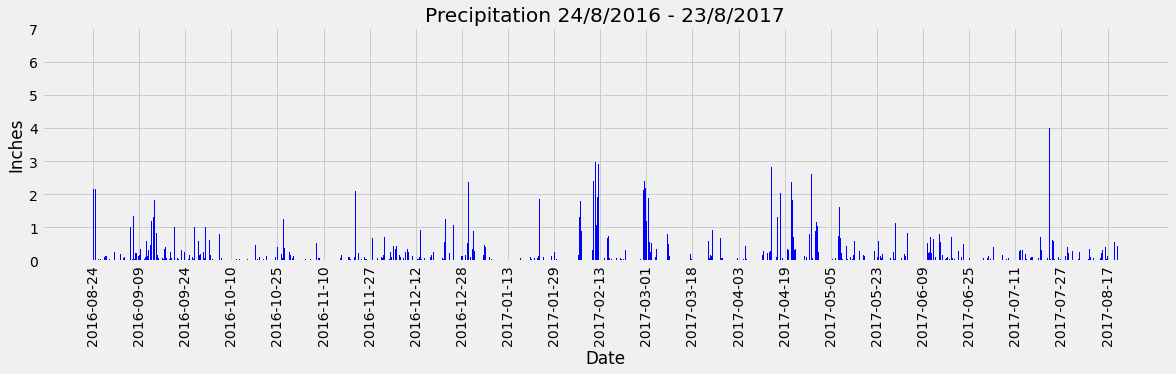

In [22]:
#Creating a bar chart

x_axis = np.arange(len(last_year_cleaned.index))
tick_locations = [value for value in x_axis][::100]
plt.figure(figsize=(18,4))
plt.bar(x_axis, last_year_cleaned['prcp'], color='b', alpha=1, align="center")
plt.xticks(tick_locations, last_year_cleaned.index[::100], rotation="vertical")
plt.title("Precipitation 24/8/2016 - 23/8/2017")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [23]:
# Using Pandas to calcualte the summary statistics for the precipitation data
precipitation = last_year_cleaned['prcp']


In [24]:
#Summary statistics for the precipitation data
print(f"The mean of the precipitation is {precipitation.mean()} inches")
print(f"The median of the precipitation is {precipitation.median()} inches")
print(f"The variance of the precipitation is {precipitation.var()} inches")
print(f"The standart deviation of the precipitation is {precipitation.std()} inches")
print(f"The standard error of the mean of the precipitation is {precipitation.sem()} inches")

The mean of the precipitation is 0.17646153846153845 inches
The median of the precipitation is 0.02 inches
The variance of the precipitation is 0.21186537774043235 inches
The standart deviation of the precipitation is 0.4602883636813257 inches
The standard error of the mean of the precipitation is 0.010253980108219828 inches


In [25]:
# Designing a query to show total number of stations in this dataset
count_station = session.query(func.count(station.name)).all()
count_station

[(9)]

In [26]:
#Listing the stations and the counts in descending order.
# What are the most active stations? (i.e. what stations have the most rows)?
chosen_data = [measurement.station,
               station.name,
               func.count(measurement.id)]
active_stations = session.query(*chosen_data).\
        group_by(measurement.station).\
        filter(measurement.station == station.station).\
        order_by(func.count(measurement.id).desc()).all()
active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [52]:
# Using the station id from the previous query, calculating the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
most_active_station_data = [measurement.station,
                            func.min(measurement.tobs),
                            func.max(measurement.tobs),
                            func.avg(measurement.tobs)]
       
most_active_station = session.query(*most_active_station_data).\
        filter(measurement.station == 'USC00519281').all()
most_active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.
chosen_data_temp = [measurement.station, 
       func.count(measurement.tobs)]
most_active_temp = session.query(*chosen_data_temp).\
        group_by(measurement.station).\
        order_by(func.count(measurement.tobs).desc()).first()
most_active_temp


('USC00519281', 2772)

In [29]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Finding the last date of the most active station observation
last_date_for_station = session.query(measurement.date).\
                        filter(measurement.station == 'USC00519281').\
                        order_by(measurement.date.desc()).first()
last_date_for_station

('2017-08-18')

In [30]:
#Calculating the date 1 year ago from the last date of the most active station observation
query_date_station = dt.date(2017, 8, 18) - dt.timedelta(days=365)
query_date_station

datetime.date(2016, 8, 18)

In [54]:
# Query the last 12 months of temperature observation data for this station 
last_year_station = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date > '2016-08-18').all()

In [55]:
#Creating dataframe for the most active station
most_active_df = pd.DataFrame(last_year_station)
most_active_df = most_active_df.dropna()
most_active_df

,date,tobs
0,2016-08-19,79.0
1,2016-08-20,81.0
2,2016-08-21,79.0
3,2016-08-22,78.0
4,2016-08-23,77.0
...,...,...
351,2017-08-14,77.0
352,2017-08-15,77.0
353,2017-08-16,76.0
354,2017-08-17,76.0


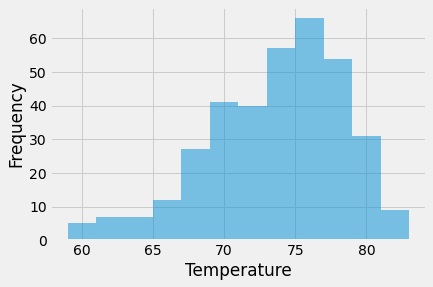

In [56]:
#Ploting the results as a histogram
plt.hist(most_active_df["tobs"], bins=12, alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

## Bonus Challenge Assignment

In [61]:
#Identifying the average temperatures in June across all dataset  
june_str = "06"
avg_june_temp = session.query(func.avg(measurement.tobs)).\
            group_by(measurement.station).\
            filter(func.strftime("%m", measurement.date) == june_str).all()
avg_june_temp

[(74.13939393939394),
 (74.05084745762711),
 (76.00537634408602),
 (71.9372197309417),
 (76.6554054054054),
 (73.39473684210526),
 (73.27118644067797),
 (77.55932203389831),
 (76.66810344827586)]

In [62]:
#Identifying average temperatures in December across all dataset
december_str = "12"
avg_december_temp = session.query(func.avg(measurement.tobs)).\
                    group_by(measurement.station).\
                    filter(func.strftime("%m", measurement.date) == december_str).all()
avg_december_temp

[(69.6842105263158),
 (71.06944444444444),
 (73.2247191011236),
 (69.29126213592232),
 (71.8348623853211),
 (72.42105263157895),
 (69.90322580645162),
 (71.10952380952381),
 (72.43333333333334)]

In [82]:
#Performing an paired t-rest(assuming that our subject is the same (weather stations), but time of observation is different)
from scipy import stats
stats.ttest_rel(avg_june_temp, avg_december_temp)
#Low pvalue (lower, than 0.05) shows us that we can reject the null hypothesis for the entire data
# and that there is significant difference between specified datasets

Ttest_relResult(statistic=array([6.95696617]), pvalue=array([0.00011759]))

In [64]:
# Using function `calc_temps` to calculate the tmin, tavg, and tmax 
# for the vacation trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

print(calc_temps('2017-06-26', '2017-07-05'))


[(73.0, 78.01666666666667, 87.0)]


In [83]:
#"Unpacking" temperatures in order craete a bar chart
data = calc_temps('2017-06-26', '2017-07-05')
tmin, tavg, tmax = data[0]
print(tmin, tavg, tmax)

73.0 78.01666666666667 87.0


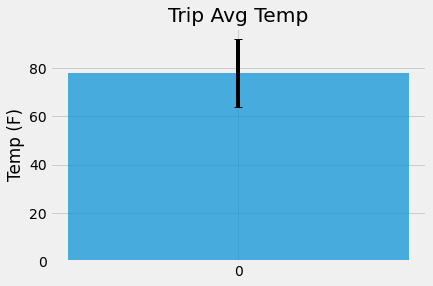

In [67]:
#Plotting temperature data
x_pos = np.arange(len(data))
error = (tmax - tmin)
fig, ax = plt.subplots()
ax.bar(x_pos, tavg, yerr=error, align='center', alpha=0.7, ecolor='black', capsize=4)
ax.set_ylabel('Temp (F)')
ax.set_xticks(x_pos)
ax.set_title('Trip Avg Temp')
plt.show()

In [84]:
# Calculating the total amount of rainfall per weather station for the trip dates using the previous year's matching dates.
# Sorting this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

chosen_data = [measurement.station, 
       func.sum(measurement.prcp)]
active_stations = session.query(*chosen_data).\
        group_by(measurement.station).\
        filter(measurement.date >= '2017-06-26', measurement.date <= '2017-07-05').\
        order_by(func.sum(measurement.prcp).desc()).all()
active_stations

[('USC00516128', 1.38),
 ('USC00519281', 0.5399999999999999),
 ('USC00513117', 0.37),
 ('USC00519397', 0.2),
 ('USC00517948', 0.12),
 ('USC00519523', 0.09000000000000001),
 ('USC00514830', 0.0)]

In [116]:
#Collecting the rainfall data for previouse year`s vacation dates
data_rainfall = [station.name,
                func.sum(measurement.prcp),
                station.latitude,
                station.longitude,
                station.elevation]
rainfall_stations = session.query(*data_rainfall).\
        group_by(measurement.station).\
        filter(measurement.station == station.station).\
        filter(measurement.date >= '2017-06-26', measurement.date <= '2017-07-05').\
        order_by(func.sum(measurement.prcp).desc()).all()
rainfall_stations

[('MANOA LYON ARBO 785.2, HI US', 1.38, 21.3331, -157.8025, 152.4),
 ('WAIHEE 837.5, HI US',
  0.5399999999999999,
  21.45167,
  -157.84888999999998,
  32.9),
 ('KANEOHE 838.1, HI US', 0.37, 21.4234, -157.8015, 14.6),
 ('WAIKIKI 717.2, HI US', 0.2, 21.2716, -157.8168, 3.0),
 ('PEARL CITY, HI US', 0.12, 21.3934, -157.9751, 11.9),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',
  0.09000000000000001,
  21.33556,
  -157.71139,
  19.5),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.0, 21.5213, -157.8374, 7.0)]

In [87]:
#Creating a list of dates for the vacation trip
list_dates = ["06-26", "06-27", "06-28", "06-29", "06-30", "07-01", "07-02", "07-03", "07-04", "07-05"]

In [85]:
# Defining a function that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()


In [108]:
#Creating lists for tmin, tavg and tmax
list_tmin = []
list_tavg = []
list_tmax = []

#Looping through the data and storing tmin, tavg and tmax
for date in list_dates:
    results = daily_normals(date)
    tmin, tavg, tmax = results[0]
    list_tmin.append(tmin)
    list_tavg.append(tavg)
    list_tmax.append(tmax)


In [111]:
#Creating a new dataframe with vacation data
normals_data = {"Date":list_dates, "Temp_min":list_tmin, "Temp_avg":list_tavg, "Temp_max":list_tmax}
normals_data_df = pd.DataFrame(normals_data)
normals_data_df

,Date,Temp_min,Temp_avg,Temp_max
0,06-26,67.0,74.214286,82.0
1,06-27,66.0,75.017857,81.0
2,06-28,69.0,74.886792,80.0
3,06-29,67.0,74.915254,80.0
4,06-30,67.0,75.596154,81.0
5,07-01,67.0,74.777778,81.0
6,07-02,68.0,75.403846,82.0
7,07-03,68.0,75.320755,87.0
8,07-04,70.0,76.571429,81.0
9,07-05,66.0,75.000000,81.0


In [112]:
#Setting date as index
normals_data_df = normals_data_df.set_index(["Date"])

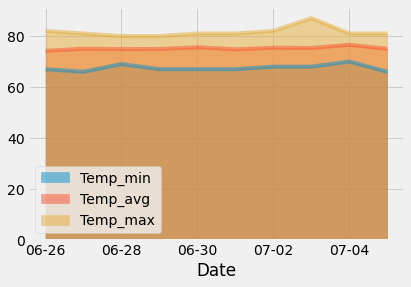

In [115]:
#Plotting the data
normals_data_df.plot.area(stacked=False)
